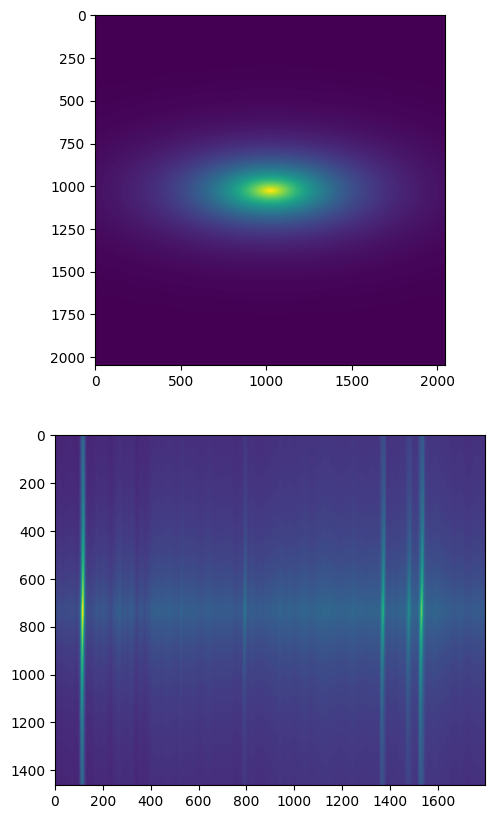

In [97]:
import astropy.io.fits as pyfits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
u.imperial.enable()


galaxSpect = 'Galax_Spect.fits'
#pyfits.info(file_flux)
hdu = pyfits.open(galaxSpect)
IMG = hdu[1].data
LSS = hdu[2].data
headerIMG= hdu[1].header
headerLSS = hdu[2].header


def imgEnd(header):
    return header["CRVAL1"]+(header["NAXIS1"]-2)*header["CDELT1"]
    
xIMG = np.arange(headerIMG["CRVAL1"], imgEnd(headerIMG) + headerIMG["CDELT1"], headerIMG["CDELT1"])

yIMG = lambda x: IMG[x]


fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].imshow(IMG)
axes[1].imshow(LSS)

plt.show()


In [98]:
headerIMG
headerLSS


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1800                                                  
NAXIS2  =                 1463                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    1 / Number of coordinate axes                      
CRPIX1  =                  1.0 / Pixel coordinate of reference point            
CRPIX2  =                  1.0 / Pixel coordinate of reference point            
CDELT1  =  1.1745426707708E-10 / [m] Coordinate increment at reference point    
CDELT2  =            0.0013675 / [arcsec] Coordinate increment at reference poin
CUNIT1  = 'm'               

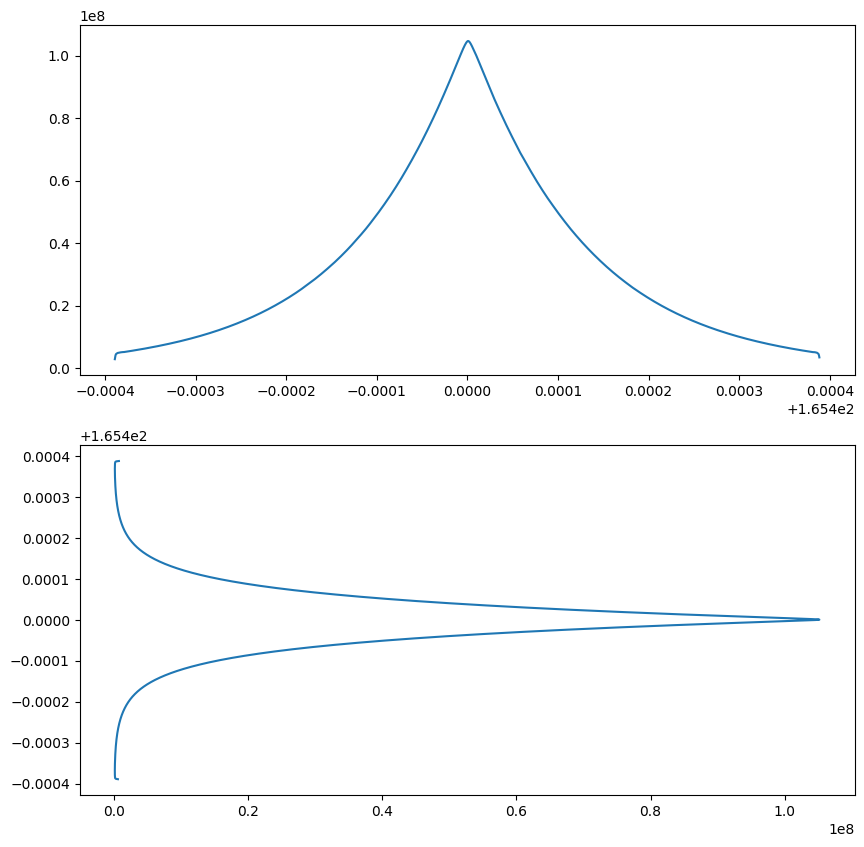

In [99]:
xStartIMG = headerIMG['CRVAL1'] - headerIMG['CRPIX1']*headerIMG['CDELT1']
xEndIMG = headerIMG['CRVAL1'] + (2047 - headerIMG['CRPIX1'])*headerIMG['CDELT1']
xDegIMG = np.arange(xStartIMG, xEndIMG, headerIMG['CDELT1'])

yStartIMG = headerIMG['CRVAL2'] - headerIMG['CRPIX2']*headerIMG['CDELT2']
yEndIMG = headerIMG['CRVAL2'] + (2047 - headerIMG['CRPIX2'])*headerIMG['CDELT2']
yDegIMG = np.arange(xStartIMG, xEndIMG, headerIMG['CDELT2'])

fix, axis = plt.subplots(2, 1, figsize=(10, 10))
#flux = np.nansum(IMG, 1)
axis[0].plot(xDegIMG, IMG[1024, :])
axis[1].plot(IMG[:, 1024], yDegIMG)

plt.show()

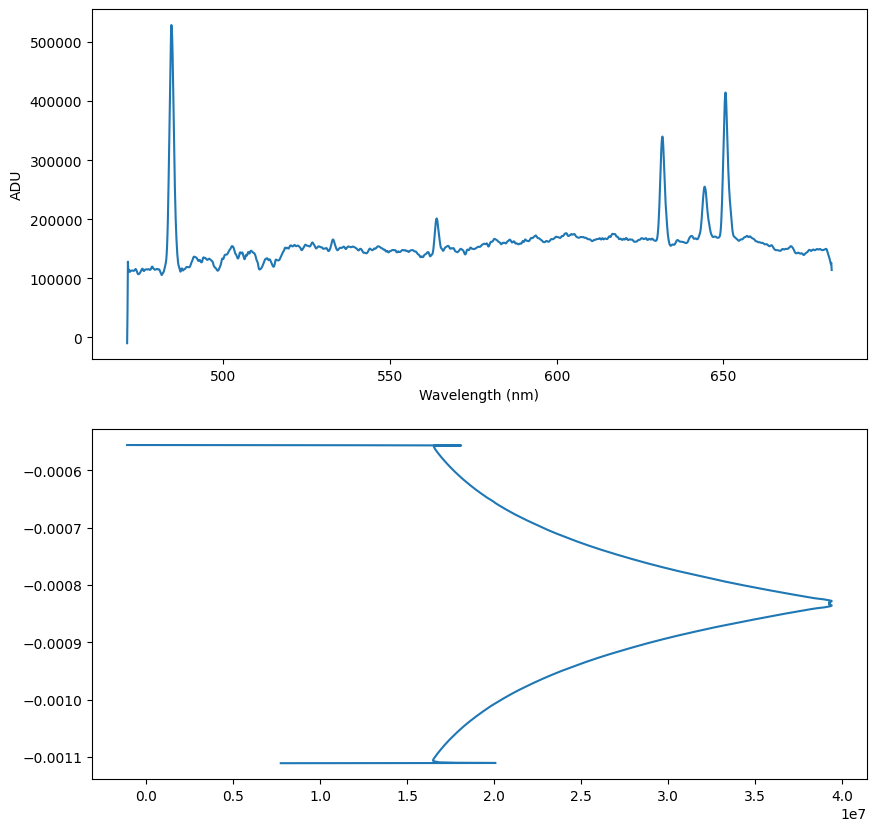

In [100]:
delX = (headerLSS['CDELT1'] * u.m).to(u.nm)
delY = (headerLSS['CDELT2'] * u.arcsec).to(u.deg)

xStartLSS = (headerLSS['CRVAL1'] * u.m).to(u.nm)
xEndLSS = ((xStartLSS + (1799 * delX)) * u.nm)
xNMLSS = (np.arange(xStartLSS.value, xEndLSS.value + delX.value, delX.value) * u.nm)

yStartLSS = (headerLSS['CRVAL2'] * u.arcsec).to(u.deg)
yEndLSS = ((yStartLSS.value + (1462 * delY.value)) * u.deg)
yDegLSS = (np.arange(yStartLSS.value, yEndLSS.value + delY.value, delY.value) * u.deg)


fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis[0].plot(xNMLSS, LSS[900, :])
axis[0].set_xlabel('Wavelength (nm)')
axis[0].set_ylabel('ADU')

flux = np.nansum(LSS[:, 600:800], axis=1)
axis[1].plot(flux, yDegLSS)

plt.show()



Corrected Wavelengths: 
 1:	629.8500nm 
 2:	821.6000nm 
 3:	846.3000nm


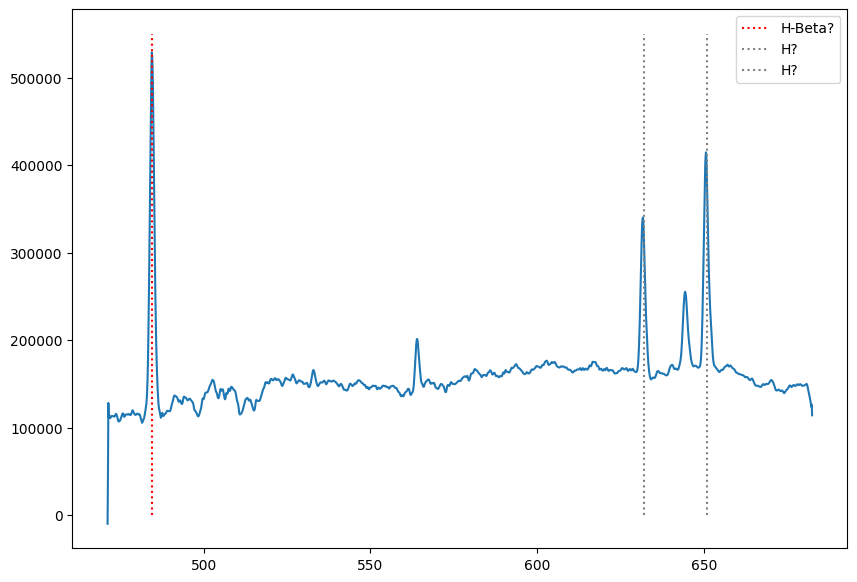

In [ ]:
#Doppler Correction and Gauss-Fit

Z = 0.3


#z = femit/fobs - 1 => femit = fobs*(1+z)
def redshiftCorrection(wavelength):
    return(wavelength * (1+Z))


#Approx redshifted emmision-wavelengths in nm:
line1 = 484.5
line2 = 632
line3 = 651

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(xNMLSS, LSS[900, :])
ax.vlines(line1, 0, 550000, linestyles=':', colors='r', label='H-Beta?')
ax.vlines(line2, 0, 550000, linestyles=':', colors='gray', label='H?')
ax.vlines(line3, 0, 550000, linestyles=':', colors='grey', label='H?')
ax.legend()


corrLine1 = redshiftCorrection(line1)
corrLine2 = redshiftCorrection(line2)
corrLine3 = redshiftCorrection(line3)

print(f'Corrected Wavelengths: \n 1:\t{corrLine1:.4f}nm \n 2:\t{corrLine2:.4f}nm \n 3:\t{corrLine3:.4f}nm')


Closes guesses with NIST-ASD so far:

Vanadium II: 629.8503
Cobalt II: 821.5998
Ne I 	846.3357



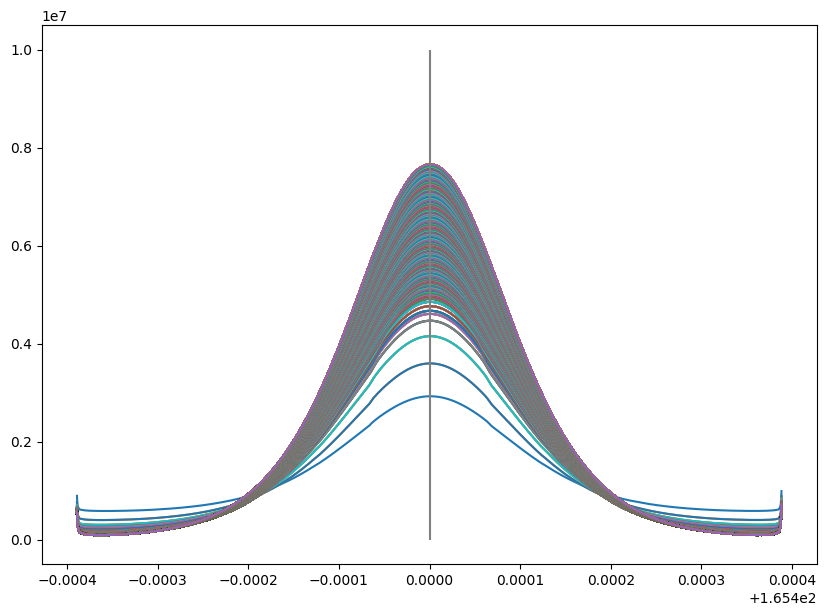

In [102]:
#Rot.-Curve (wrong slices so far)
sliceSize = 150

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

for i in range(len(xDegIMG)):
    ax.plot(xDegIMG, IMG[:, i:sliceSize])

ax.vlines(165.4, 0, 1e7, linestyles='-', colors='gray')

ax.set_xlabel='deg'
ax.set_ylabel='deg'
